<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-notes/blob/main/cs195_maximum_likelihood_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

'''
# If you want generate some samples from a 1-D Gaussian distribution curve
mean     = 0.1
std_dev  = 1
number_of_data_points = 1000
data = np.random.normal(mean, std_dev, number_of_data_points) # generate 1000 samples from a Gaussian distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
'''

#**Learning Probabilistic Model**
> Now, we are going to fit a probabilistic model to a set of given data points {$\boldsymbol{x_1, x_2, \ldots, x_I}$}. For example, you can assume each data point could be 1D cooridnate. For example, $x_1=(3.5)$ denotes 3.5 units along the x-coordinate. Alternately, you can also assume each data point has a 2D coordinate. For example, $x_1=(3.5, 5)$ denotes 3.5 units along the x-coordinate and 5 units along the y-coordinate.

> Also, you can assume that the model you want to fit to the data could be a continuous probability distribution, such as a Gaussian distribution, which we have analyzed rigorously in the past. The continuous probability distribution is expressed in terms of a *probability density function (pdf)*. A Gaussian distribution has two parameters $\boldsymbol{\theta}$. or a 1D Gaussian distribution, it is represented by parameters mean $\mu$ and standard deviation $\sigma$. In other words, $\boldsymbol{\theta}$ = ($\mu, \sigma$). For example, a 1D Gaussian distribution could be represented by $\boldsymbol{\theta}$ = ($\mu=0.0, \sigma=2.0$)

> This process of estimating the probabilistic model parameters from the given data points {$\boldsymbol{x_1, x_2, \ldots, x_I}$} is referred to as **learning** because we are going to learn the parameters from the data.



#**Maximum Likelihood (ML) Method**
> The maximum likelihood (ML) method finds the set of parameters $\boldsymbol{\theta}$ under which the data {$\boldsymbol{x_1, x_2, \ldots, x_I}$} are **most likely**. Recall the different terms from Bayes' rule: likelihood, prior, and posterior.


> The likelihood function is denoted by P($\boldsymbol{x_1, x_2, \ldots, x_I \mid \theta}$).

> In order to calculate the likelihood function at a single data point P($\boldsymbol{x_i \mid \theta}$), we simply evaluate the *probability density function* at that data point $\boldsymbol{x_i}$. We make the simplifying assumption that each data point was drawn independently from the probability distribution.

> The likelihood function P($\boldsymbol{x_1, x_2, \ldots, x_I \mid \theta}$) is the product of the individual likelihoods. It could be expressed as follows:

> P($\boldsymbol{x_1, x_2, \ldots, x_I \mid \theta}$) = P($\boldsymbol{x_1 \mid \theta}$) P($\boldsymbol{x_2 \mid \theta}$)...P($\boldsymbol{x_I \mid \theta}$)

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
> = $\prod_{i=1}^{I}$P($\boldsymbol{x_i \mid \theta}$)

Hence, the maximum likelihood (ML) estimate of the parameters is:

> $\theta_{max}$ = $\arg\max_{\theta}^{}$[ P($\boldsymbol{x_1, x_2, \ldots, x_I \mid \theta}$)]

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
= $\arg\max_{\theta}^{}$[ P($\boldsymbol{x_1 \mid \theta}$) P($\boldsymbol{x_2 \mid \theta}$)...P($\boldsymbol{x_I \mid \theta}$)]

#**Example: Maximum Likelihood (ML) Estimate for a set of 1D data points using 1D Gaussian Likelihood Function**

> **Observed data points:** We are given 10 data points {$\boldsymbol{x_1, x_2, \ldots, x_{10}}$} and each data point 1D cooridnate: {$\boldsymbol{x_1=-2.0, x_2=0.0, x_3=1.0, x_4=1.4, x_5=1.8, x_6=2.5, x_7=3.0, x_8=3.2, x_9=4.0, x_{10}=4.3}$}.

> We can refer to these as our *observations* or *observed data*. I generated these 10 numbers at random, but you can use any other random numbers if you prefer.

> **Likelihood Function:** Let’s consider 1D Gaussian distribution as our likelihood function.

> with $x$ is random variable (which can take continuous values)
> and mean $\mu=0.1$ and standard deviation $\sigma=1$:

> $P(x) = \frac{1}{\sqrt(2\pi\sigma^2)}exp^{\frac{-(x-\mu)^2}{2\sigma^{2}}}$

> &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;
> $= \frac{1}{\sqrt(2\pi)}exp^{\frac{-(x-0.1)^2}{2}}$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def compute_1d_gaussian_likelihood(observed_data, gaussian_mean=0.0, gaussian_std_dev=1.0):

  plt.figure(figsize=(6,3))
  # append two more dummy points: one at a very large positive number and another at a very large negative number (just to draw the curve better without affecting the final outcome)
  observed_data_new = list(observed_data)
  observed_data_new.append(100)
  observed_data_new.insert(0, -100)
  observed_data_new = np.array(observed_data_new)


  # compute the likelihood value for each data point individually and store them in a list
  likelihoods_at_observed_data   = np.exp(-0.5*((observed_data_new-gaussian_mean)/gaussian_std_dev)**2) / (gaussian_std_dev * np.sqrt(2*np.pi))

  # plot the observed points along the x-axis
  plt.plot(observed_data_new, np.zeros(len(observed_data_new)), 'bo')
  plt.plot(observed_data_new, likelihoods_at_observed_data, 'r', linewidth=2)


  # multiply all the likelihood values together to compute the overall likelihood for all the observed data points
  likelihoods_at_observed_data = likelihoods_at_observed_data[1:-1] # remove the two dummy items from both ends
  overall_likelihood = np.prod(likelihoods_at_observed_data)

  # plot the likelihood value for each single data point
  likelihood_str = f"{overall_likelihood:.2e}"
  # plot overall likelihood value as a legend
  plt.text(0.90, 0.90, 'likelihood:\n'+likelihood_str,
         transform=plt.gca().transAxes,
         fontsize=12,
         ha='right',
         va='top')

  plt.title('1D Gaussian likelihood with mean='+str(gaussian_mean)+', std_dev='+str(gaussian_std_dev))
  plt.xlabel('continuous random variable x' )
  plt.ylabel('Likelihood function values')
  xmin     =-5
  xmax     = 5
  plt.xlim([xmin, xmax])
  plt.ylim([0, 1.0])
  plt.show()


  return likelihoods_at_observed_data, overall_likelihood

# given observed data
observed_data = [-2.0, 0.0, 1.0, 1.4, 1.8, 2.5, 3.0, 3.2, 4.0, 4.3]

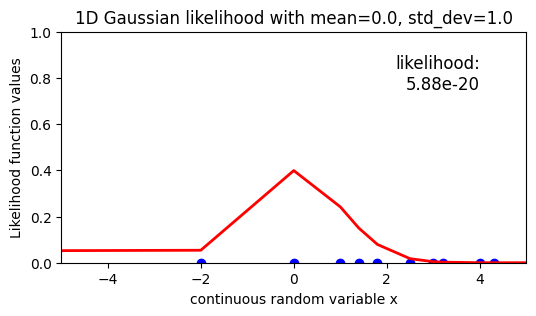

In [ ]:
# compute the likelihood with 1D Gaussian likelihood function mean=0.0, std_dev=1.0
likelihoods_list_1, overall_likelihood_1 = compute_1d_gaussian_likelihood(observed_data, gaussian_mean=0.0, gaussian_std_dev=1.0)

###**Interpretation of the Likelihood Curve#1**
> Let's denote the model parameter for this likelihood: $\boldsymbol{\theta_{1}}=$(mean=0.0, std_dev=1.0)

> The overall likelihood is $5.88$×$10^{-20}$, which is extremely low. This can be explained by examining the individual likelihood terms, particularly the rightmost data points. Under this Gaussian distribution with a mean of 0.0 and a standard deviation of 1.0, the likelihood of these points is very low. This suggests that half of the data points (5 out of 10) are highly unlikely to have been generated by this Gaussian distribution.

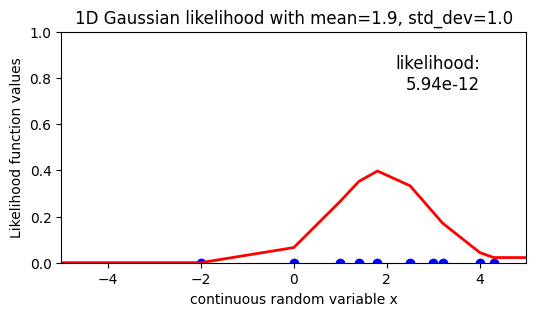

In [ ]:
# compute the likelihood with 1D Gaussian likelihood function mean=1.9, std_dev=1.0
likelihoods_list_2, overall_likelihood_2 = compute_1d_gaussian_likelihood(observed_data, gaussian_mean=1.9, gaussian_std_dev=1.0)

###**Interpretation of the Likelihood Curve#2**
> Let's denote the model parameter for this likelihood: $\boldsymbol{\theta_{2}}=$(mean=1.9, std_dev=1.0)

> The overall likelihood is $5.94$×$10^{−12}$, which is better than the previous one. Under this Gaussian distribution with a mean of 1.9, the distribution is pushed toward most of the data points. However, we retained the same standard deviation of 1.0. Hence, the overall likelihood ($5.94$×$10^{−12}$) of these points is higher than that of the previous distribution.

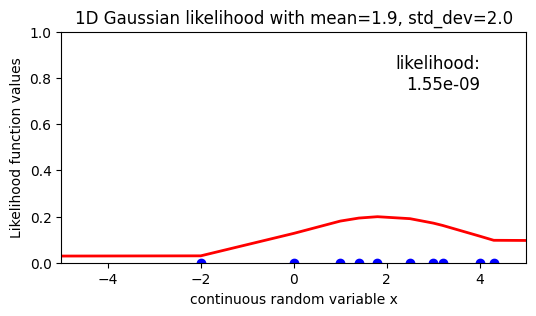

In [ ]:
# compute the likelihood with 1D Gaussian likelihood function mean=1.9, std_dev=1.0
likelihoods_list_3, overall_likelihood_3 = compute_1d_gaussian_likelihood(observed_data, gaussian_mean=1.9, gaussian_std_dev=2.0)

###**Interpretation of the Likelihood Curve#3**
> Let's denote the model parameter for this likelihood: $\boldsymbol{\theta_{3}}=$(mean=1.9, std_dev=2.0)

> The overall likelihood is $1.55$×$10^{−09}$, which is best among all the likelihoods. Under this Gaussian distribution with the same mean of 1.9, we increased the standard deviation to 2.0, which reflects the spread of the data. As a result, the overall likelihood ($1.55$×$10^{−9}$) is the highest among the three likelihoods.

> If we stop exploring additional model parameters and conduct our experiments using these three models $\boldsymbol{\theta_{1}, \theta_{2}, \theta_{3}}$, the maximum likelihood (ML) estimate will select the parameters of the last model as the best parameters. $\boldsymbol{\theta_{3}}=$(mean=1.9, std_dev=2.0)


> $\boldsymbol{\theta_{max}}$ = $\arg\max_{\theta}^{}$[ P($\boldsymbol{x_1 \mid \theta_{1}}$), P($\boldsymbol{x_2 \mid \theta_{2}}$), P($\boldsymbol{x_I \mid \theta_{3}}$)]

> &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;
> = $\arg\max_{\theta}^{}$[ $5.88$×$10^{-20}$, $5.94$×$10^{−12}$, $1.55$×$10^{−09}$]

> &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;
> = $\boldsymbol{\theta_{3}}$


This is the essense of **maximum likelihood (ML) estimate**.

#**Group Exercise: Maximum Likelihood (ML) Estimate**

> **Observed data points:** You are given 10 data points {$\boldsymbol{x_1, x_2, \ldots, x_{10}}$} and each data point 1D cooridnate: {$\boldsymbol{x_1=-2.0, x_2=0.0, x_3=-1.0, x_4=-1.4, x_5=-1.8, x_6=-2.5, x_7=-3.0, x_8=3.2, x_9=4.0, x_{10}=4.3}$}.


> **Likelihood Function:** Consider 1D Gaussian distribution as our likelihood function like our previous example.

> First, compute the likelihoods under three different sets of parameters: $\boldsymbol{\theta_{1}, \theta_{2}, \theta_{3}}$. Try to guess the best possible model parameters by analyzing the data. For each model, you need to consider 2 numbers, i) the mean and ii) standard deviation, as demonstrated in the example above.

> Then select the best parameters (among your three model parameters) based on the maximum likelihood estimation method.


In [ ]:
# your code here
# ...
# ...
